# Data quality assessment for the Galactic Plane Survey (GPS) data
***

Date of creation: July 7, 2020

Last modification: July 14, 2020

By: Sambatriniaina H. A. Rajohnson

This notebook shows how to:
* **Get the estimation of rms for HI cubes and continuum maps**
* **PV diagrams ( dec vs. spectral axis) of HI cubes**
* **dec vs. ra view of HI cubes**
* **Continuum maps (dec vs. ra)**

in order to check the data quality after data reduction ([configuration file](https://github.com/paoloserra/GPS-data-reduction/blob/master/caracal_config_files/V0_1573852860_1.yml)), continuum subtraction and cleaning.

This data has been obtained by using MeerKAT, and one observation has 9 pointings with ~1 hour each (9 hours of total integration time).
The details of the mosaic observation can be found in this [spreadsheet](https://docs.google.com/spreadsheets/d/14t6828wy7gXEgQrSpQ9wmhE-i3IfrnAIIOPinb8Z6bM/edit#gid=0).

For each pointing, and for a robustness of 0.5, an rms of 0.25 mJy/beam is expected.

In [69]:
import aplpy
from astropy import units as u
from astropy import wcs
from itertools import chain
from matplotlib.offsetbox import AnchoredText,AnchoredOffsetbox
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab as pl
import spectral_cube
from spectral_cube import SpectralCube
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
#Capture all Warnings

## 1. Importing the cubes in SpectralCube
All the 9 fields have the same characteristics.

### 1.1 Continuum cubes

In [8]:
#Field names and directory name:
obs_name ='1547499081'
field = ['T29R03C01','T29R03C03','T29R03C05','T29R04C02','T29R04C04','T29R04C06','T30R00C02','T30R00C04','T30R00C06']

In [4]:
#Continuum fields
c1 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T29R03C01_3-MFS-image.fits'
c2 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T29R03C03_3-MFS-image.fits'
c3 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T29R03C05_3-MFS-image.fits'
c4 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T29R04C02_3-MFS-image.fits'
c5 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T29R04C04_3-MFS-image.fits'
c6 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T29R04C06_3-MFS-image.fits'
c7 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T30R00C02_3-MFS-image.fits'
c8 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T30R00C04_3-MFS-image.fits'
c9 = '/idia/projects/vela/V0_GPS_results/0V0_continuum/0V0_continuum_1547499081/V0_T30R00C06_3-MFS-image.fits'
cube_cont1 = SpectralCube.read(c1)
cube_cont2 = SpectralCube.read(c2)
cube_cont3 = SpectralCube.read(c3)
cube_cont4 = SpectralCube.read(c4)
cube_cont5 = SpectralCube.read(c5)
cube_cont6 = SpectralCube.read(c6)
cube_cont7 = SpectralCube.read(c7)
cube_cont8 = SpectralCube.read(c8)
cube_cont9 = SpectralCube.read(c9)

In [5]:
cube_cont1 #in frequency #Continuum image at 1.3688 GHz

SpectralCube with shape=(1, 3600, 3600) and unit=Jy / beam:
 n_x:   3600  type_x: RA---SIN  unit_x: deg    range:   139.941823 deg:  145.054513 deg
 n_y:   3600  type_y: DEC--SIN  unit_y: deg    range:   -54.069265 deg:  -51.071487 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 1368847656.250 Hz:1368847656.250 Hz

The continuum image is a 3600 $\times$ 3600 pixels map, taken at 1.3688 GHz

### 1.2 HI cubes

In [6]:
h1 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T29R03C01_HI.image.fits'
h2 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T29R03C03_HI.image.fits'
h3 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T29R03C05_HI.image.fits'
h4 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T29R04C02_HI.image.fits'
h5 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T29R04C04_HI.image.fits'
h6 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T29R04C06_HI.image.fits'
h7 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T30R00C02_HI.image.fits'
h8 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T30R00C04_HI.image.fits'
h9 = '/idia/projects/vela/V0_GPS_results/1V0_HI_cube/1V0_HI_cube_1547499081/0123456789_V0_T30R00C06_HI.image.fits'
cube_h1 = SpectralCube.read(h1)
cube_h2 = SpectralCube.read(h2)
cube_h3 = SpectralCube.read(h3)
cube_h4 = SpectralCube.read(h4)
cube_h5 = SpectralCube.read(h5)
cube_h6 = SpectralCube.read(h6)
cube_h7 = SpectralCube.read(h7)
cube_h8 = SpectralCube.read(h8)
cube_h9 = SpectralCube.read(h9)

In [7]:
cube_h1 #in velocity m/s

SpectralCube with shape=(583, 2400, 2400) and unit=Jy / beam:
 n_x:   2400  type_x: RA---SIN  unit_x: deg    range:   140.814105 deg:  144.182215 deg
 n_y:   2400  type_y: DEC--SIN  unit_y: deg    range:   -53.584055 deg:  -51.585289 deg
 n_s:    583  type_s: VRAD      unit_s: m / s  range: -1941150.459 m / s:23728921.198 m / s

The HI cube is a 2400 $\times$ 2400 pixels size, with 583 channels ranging from -1941 km/s (1.4296 GHz) to 23729 km/s (1.3080 GHz)

## 2. RMS

By using [CARTA](https://cartavis.github.io/), and by selecting a region across the field, we were able to check all the bad channels due to flagging, or residual RFI, so that we can avoid them. We can also see the mean value of the rms for each field. 

However, by running the pipeline for MeerKAT data reduction, the measured rms is already given. So this step is just `optional`.

The following channels were seen to be flagged during calibration: (From the 583 initial channels)

* 1.308 GHz (chan 0)-1.3094 GHz (chan 7)
* Spikes at 1.3192 GHz (chan 54), 1.3627 GHz (chan 262), 
* RFI emission: 1.3765 GHz (chan 328) - 1.3859 GHz (chan 373)
* Milky Way: 1.418174 GHz (chan 527)-1.423190 (chan 551), flagged
* After channel 552, there are only a few channels so we can avoid them

If the cube was circular not squared, a lot of pixels outside the beam has a value of NaN, so we cannot get any value for mean, std, etc. So we need to take a subsection. But for now, it is fine so we can directly measure the rms for all the cube.

In [56]:
def rms(cube,range_channels):
    '''
    range_channels = range(chan1,chan2) + range(chan3,chan4)
    '''
    rms = []
    for i in range_channels:
        x = np.std(cube[i, 0:500, 0:500]) #take 500 pixel region
        if x != 'nan':
            rms.append(x.value)
    mean_rms = np.nanmean(rms)
    return mean_rms

In [51]:
range_channels = chain(range(12, 54),range(55, 262),range(262, 328),range(374,527))
chan = []
for i in range_channels:
    chan.append(i)

In [57]:
cube = [cube_h1,cube_h2,cube_h3,cube_h4,cube_h5,cube_h6,cube_h7,cube_h8,cube_h9]

rms_value = [rms(cube[i],chan) for i in range(len(cube))]
print(rms_value)

[0.0002795924486305851, 0.0003001888679478787, 0.00026966241097802087, 0.00028694533749431785, 0.0002978564849228829, 0.00029201168310977757, 0.00028510581210462586, 0.00029922157471788587, 0.00030052815965709125]


In [65]:
cube_cont = [cube_cont1,cube_cont2,cube_cont3,cube_cont4,cube_cont5,cube_cont6,cube_cont7,cube_cont8,cube_cont9]
rms_cont = [np.std(cube_cont[i][0:500,0:500]).value for i in range(len(cube))] #take the first 500 pixels
print(rms_cont)

[1.8509108485886827e-05, 2.6904564947471954e-05, 2.138767194992397e-05, 2.340097853448242e-05, 2.4445116650895216e-05, 1.878012699307874e-05, 1.7204676623805426e-05, 1.915329266921617e-05, 1.992919533222448e-05]


## 3. Bandpass shape in the central region of the cubes

In [66]:
Nxy = cube_h1.shape[1] #spatial pixel numbers
print('The data has',Nxy,' pixels in one axis')
cell = np.round_(cube_h1.header['CDELT2']*3600.) #cell size in arcsec
print('The cell size is',cell,' arcsec')
lbox = 120. #unit in arcsec, for a 2 arcmin box size
lpix = int(lbox/cell) # the box will contain lpix pixels in one axis length. (40 pixels contained in a box in one axis)
print('For a box of',lbox/60,' arcminutes, one axis will contain',lpix,' pixels')
cube_width_in_pix = lpix/2
num_boxes = np.round(Nxy/lpix) #our cube can therefore contain 90 boxes of 2 arcmin x 2 arcmin size in each axis.
print('The whole cube can therefore contain',num_boxes,' boxes in one axis')

The data has 2400  pixels in one axis
The cell size is 3.0  arcsec
For a box of 2.0  arcminutes, one axis will contain 40  pixels
The whole cube can therefore contain 60.0  boxes in one axis


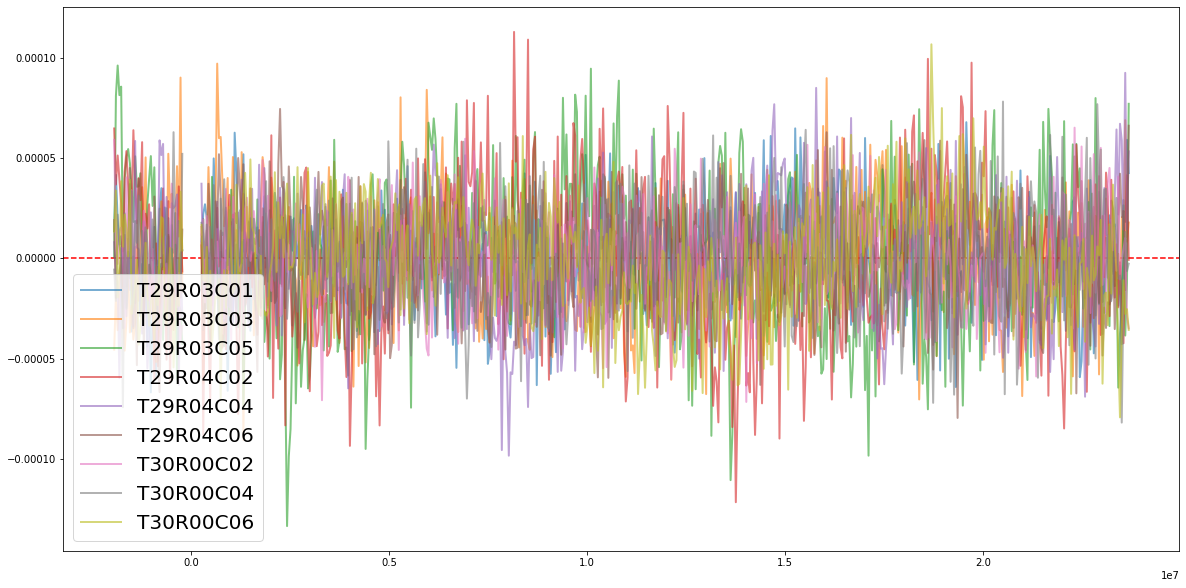

In [68]:
# bandpass in the central region of the cubes
x0_central_pix = (Nxy/2)
y0_central_pix = (Nxy/2)
#For a 40 pixels or 2 arcmin box in the center
xstart = int(x0_central_pix-cube_width_in_pix)
xend = int(xstart+lpix)
ystart = int(y0_central_pix-cube_width_in_pix)
yend = int(ystart+lpix)

j=0
racubes = []
ra_spectra_mean = []
pl.figure(figsize=(20,10))
pl.axhline(y=0, color='red', zorder=1,linestyle='--')
for i in range(len(cube)):
    freqs = cube[i].spectral_axis[1:]
    racubes.append(cube[i][1:,xstart:xend,ystart:yend])
    ra_spectra_mean.append(racubes[j].mean(axis=(1,2))/racubes[j].unit)
    pl.plot(freqs, ra_spectra_mean[j].array, alpha=0.6, lw=2,label=field[i])
    pl.legend(fontsize=20)
    j+=1
#pl.ylim([-0.0001,0.0001]) #zooming

## 4. Cube Inspection

Obtained by fixing one positional axis for HI cubes

## 4.1. Continuum maps after calibration (DEC vs. RA)

rms continuum ~ 1 e-5 Jy/beam, so let's make the plot **level** to -5$\sigma - 5\sigma$

In [131]:
def make_PV_plot(cube, field, vmin=0, vmax=0, xlabel='RA(J2000)',ylabel='DEC(J2000)',hspace=0.0,wspace=-0.05,
                 type_map='dec_vs_ra',chan_fixed=0,ra_fixed=250, figsize=(20,20),subplot_x=3,subplot_y=3):
    
    fig, axs = plt.subplots(subplot_x, subplot_y, figsize=figsize, sharex=True, sharey=True,
                        gridspec_kw={'hspace': hspace, 'wspace': wspace})
    
    for i in range(len(axs.flat)):
        if type_map == 'dec_vs_ra':
            x = np.flip(cube[i][chan_fixed,:, :].array,0) #Inverting the declination with fliplr (axis = 0), channel = 0 since no channel
        else:
            x = np.fliplr(cube[i][:,:, ra_fixed].array) #Inverting the declination with fliplr, RA fixed
            x = x.T
        im = axs.flat[i].imshow(x, vmin=vmin, vmax=vmax) #no transposition
        #all the pixels in the cube
        #vmin and vmax range of colors
        if i == 0 or i == 3:
            axs.flat[i].set_ylabel(ylabel,fontsize=20,family='serif')
        elif i == 7 or i ==8:
            axs.flat[i].set_xlabel(xlabel,fontsize=20,family='serif')
        elif i ==6:
            axs.flat[i].set_ylabel(ylabel,fontsize=20,family='serif')
            axs.flat[i].set_xlabel(xlabel,fontsize=20,family='serif')
        axs.flat[i].minorticks_on()
        axs.flat[i].tick_params(which='major', length=10, width=2, direction='in',color="white")
        axs.flat[i].tick_params(which='minor', length=4, width=2, direction='in',color="white")
        axs.flat[i].yaxis.set_ticks_position('both')
        axs.flat[i].xaxis.set_ticks_position('both')
        plt.setp(axs.flat[i].get_xticklabels(), visible=False)
        plt.setp(axs.flat[i].get_yticklabels(), visible=False)
        
        #text
        anchored_text = AnchoredText(field[i],loc=2, borderpad=0.5,frameon=False,
                                prop={'family': 'serif', 'size': 20, 'fontweight': 'normal', 'color':'white','backgroundcolor': 'black'})
        anchored_text.patch.set_alpha(0.5)
        axs.flat[i].add_artist(anchored_text)
        
        #axs.flat[i].text(2000, 100, field[i], size=20, rotation=0., family='serif', color = 'white',
             #ha="right", va="top",
             #bbox={'boxstyle': 'square','facecolor': 'black', 'alpha': 0.5}
             #)
    pl.subplots_adjust(wspace=-0.0, hspace=0.00)
    pl.tight_layout()

    cbar = fig.colorbar(im, ax=axs.flat,pad=0.05,orientation='horizontal')
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.yaxis.get_offset_text().set(size=20)
    cbar.ax.set_xlabel(r'Flux (Jy/beam)',fontsize=20)
    #pl.savefig('PV_map_HI_cube_1547413577.png',overwrite=True)

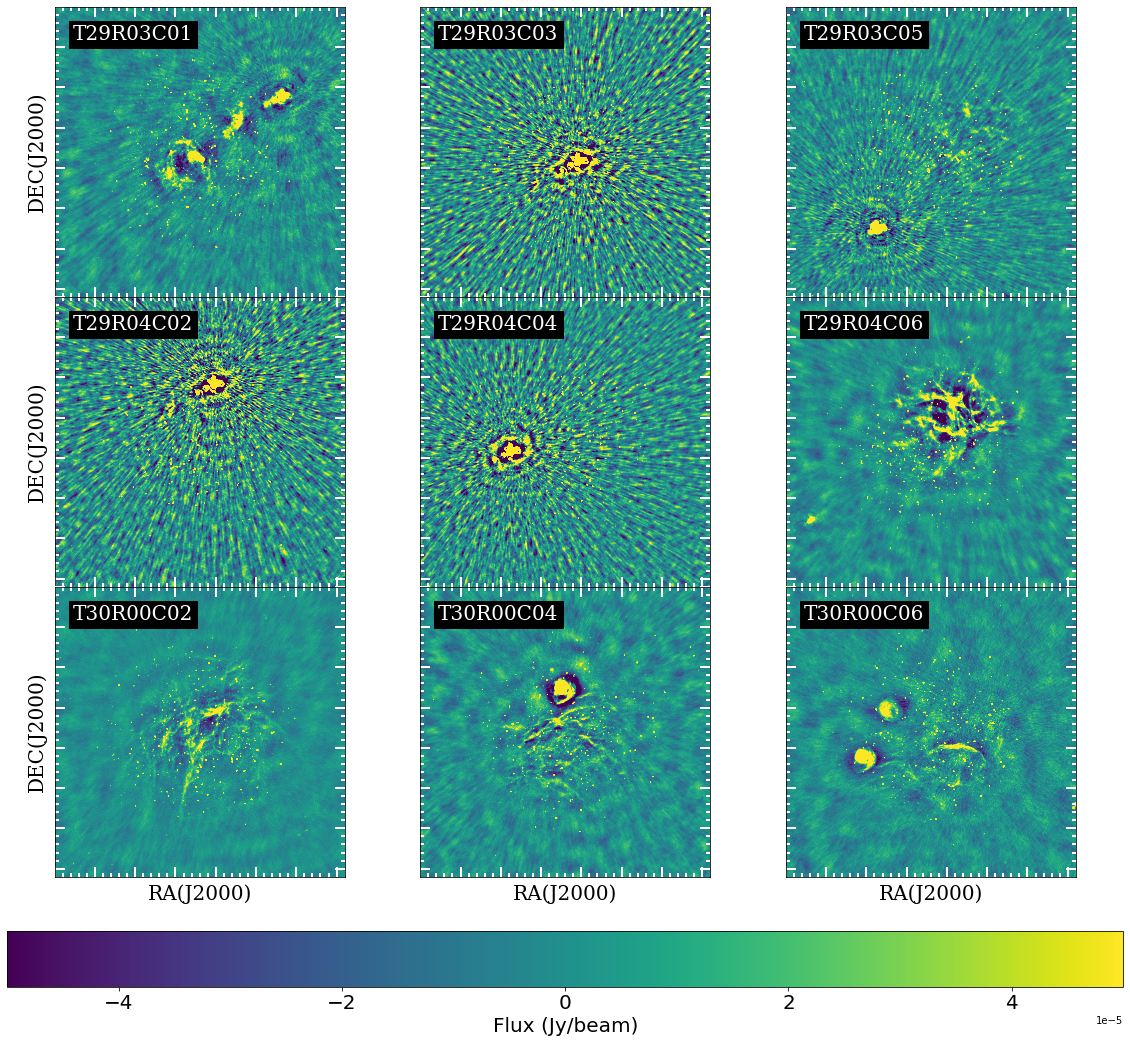

In [100]:
make_PV_plot(cube_cont,field,vmin=-0.00005,vmax=0.00005)

## 4.2 HI cubes after continuum subtraction

**PV map**: Fixing one positional axis

For a `SpectralCube` type, we cannot convolve into a common beam, however, in its header it is already giving its mean beams values, and even if when we type `cube[i].beam`, the beams are already the mean values, so we can directly plot the PV diagram.

However: `2D slices along a spectral axis are not allowed for VaryingResolutionSpectralCubes. Convolve to a common resolution with **convolve_to** before attempting position-spectral slicing.`

Fortunately, the cube has already the same beam value for all channels so we can just take a slice from the cubes and process to the PV maps.

Beforehand, let's just plot the HI map at the central channel 250, to see at a glance if there is residual continuum.

For the level, we will take -3$\sigma - 3\sigma$ or -6e-4 Jy/beam to 6e-4 Jy/beam

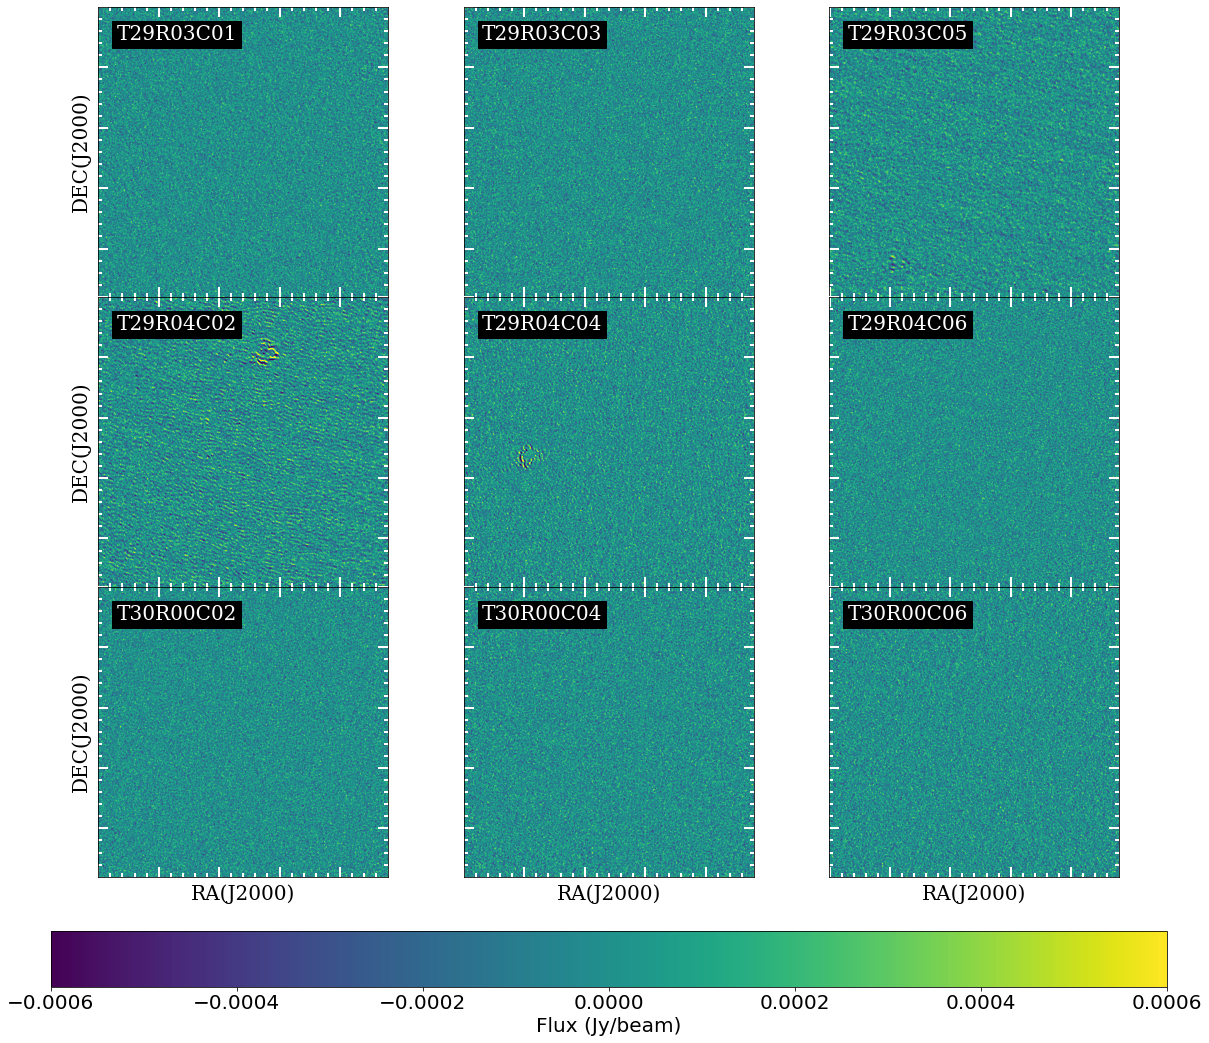

In [101]:
make_PV_plot(cube,field,vmin=-6e-4,vmax=6e-4,chan_fixed=250)

### 4.2.2 PV map all declination

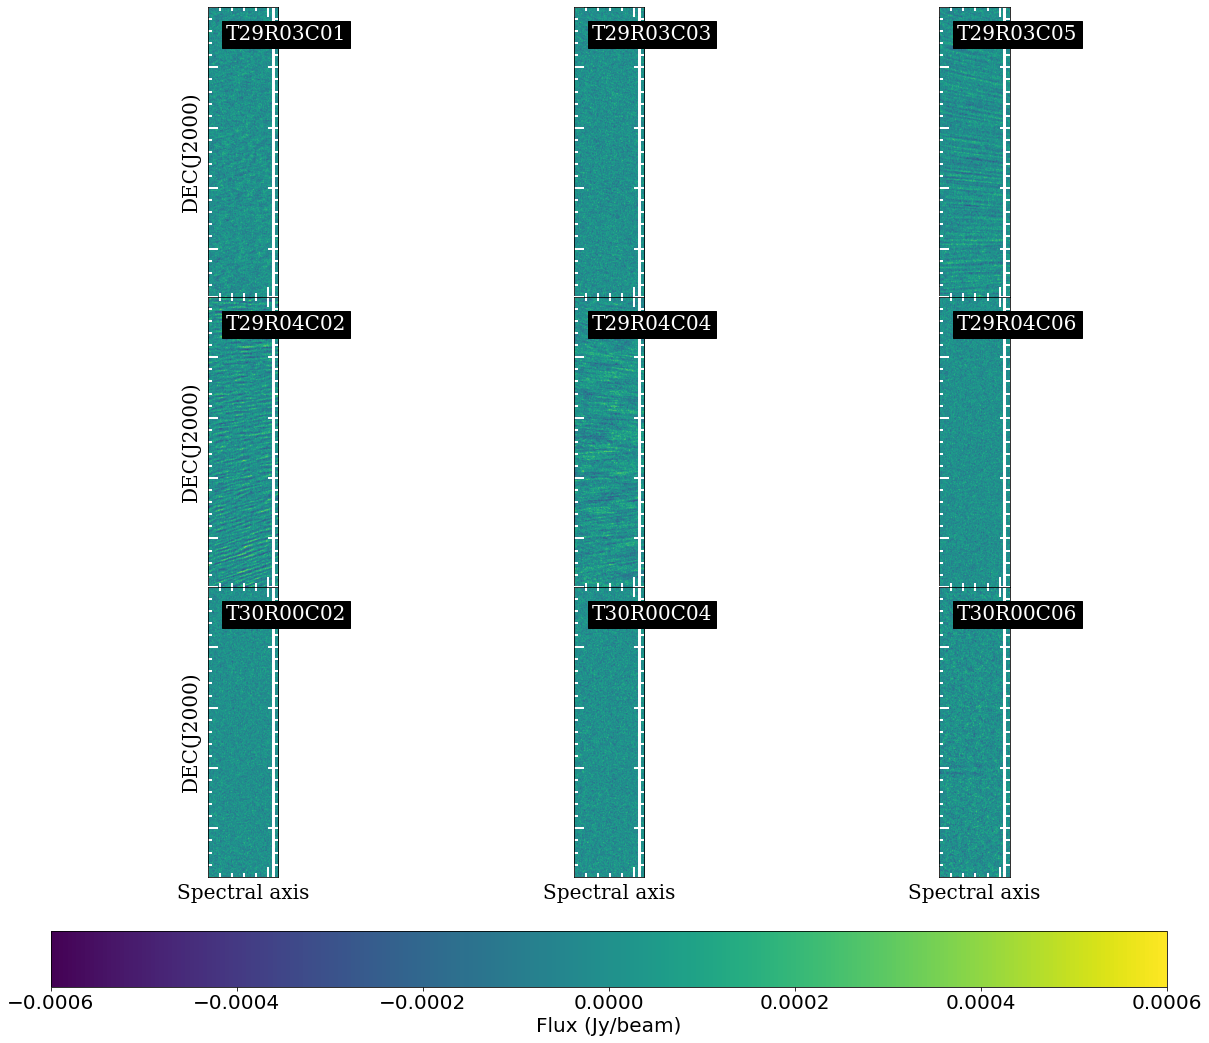

In [109]:
make_PV_plot(cube,field,vmin=-6e-4,vmax=6e-4,ra_fixed=1200, type_map='pv',xlabel='Spectral axis')

### 4.2.3 PV map 500 pixels at the center

In [108]:
#Subset at 500 pixels in the center
sub_h = [cube[i][:,int(cube[i].shape[2]/2)-250:int(cube[i].shape[2]/2)+250, int(cube[i].shape[2]/2)-250:int(cube[i].shape[2]/2)+250] for i in range(len(cube))]

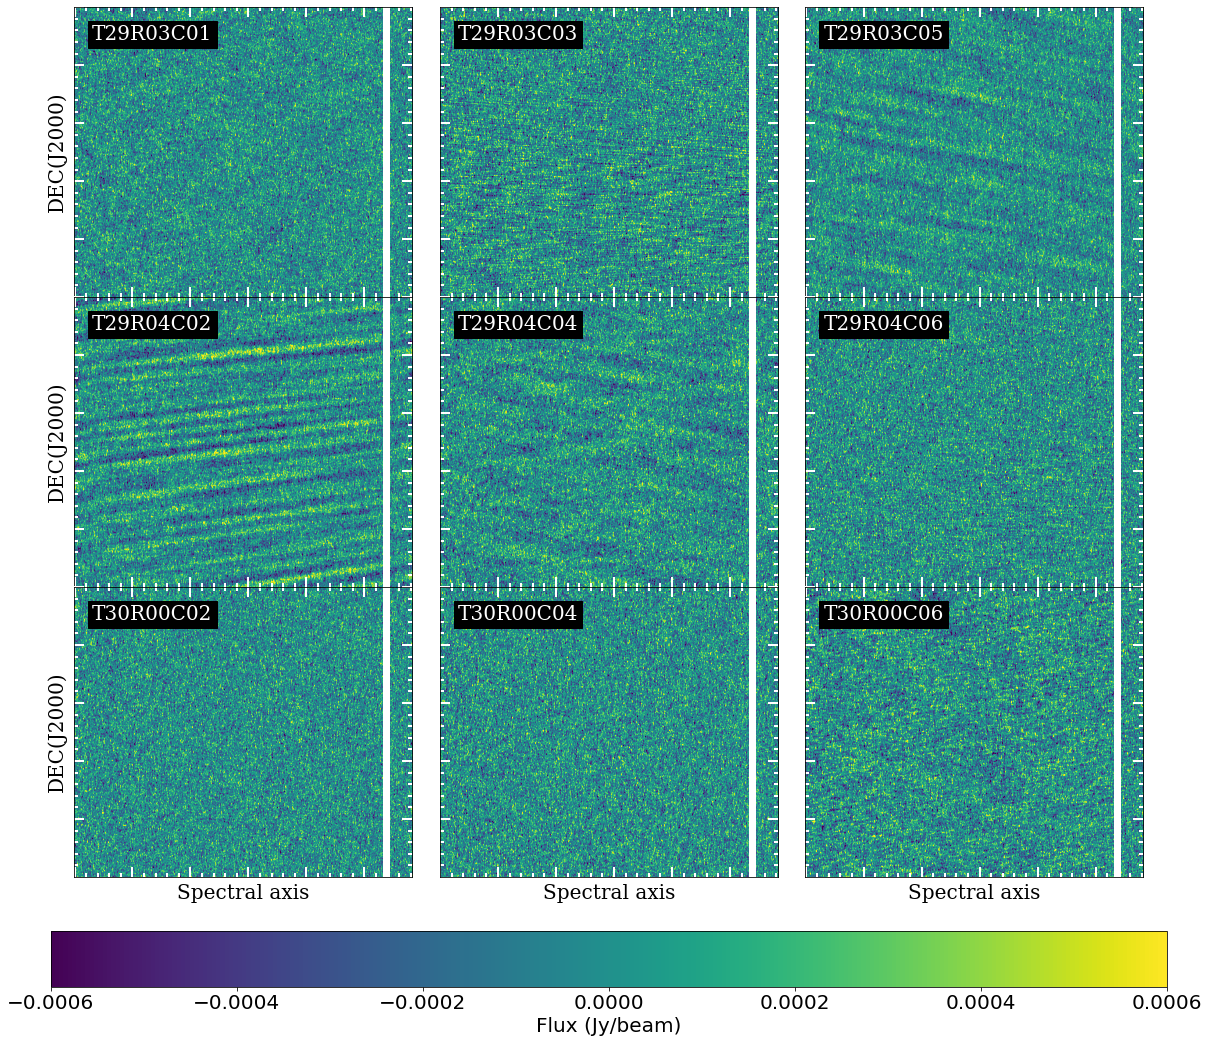

In [110]:
make_PV_plot(sub_h,field,vmin=-6e-4,vmax=6e-4,ra_fixed=250, type_map='pv',xlabel='Spectral axis')

# 5. Checking some detections PV maps at the field with stripes
## field 4: T29R04C02

In [127]:
def get_subcube(main_cube, ra, dec, freq, width='3arcmin',chans=100):
    #channel width in GHz
    df = main_cube.header['CDELT3']*(u.Hz).to(u.GHz) 
    
    #frequency ranges with the number of channels to be extracted
    freq_lower = '%.5fGHz' % (freq-chans*df) 
    freq_upper = '%.5fGHz' % (freq+chans*df)
    
    #Extraction
    crtf_str = 'centerbox[['+str(ra)+','+str(dec)+'], ['+width+','+width+']], coord=fk5, range=['+freq_lower+', '+freq_upper+']]'
    target_subcube = main_cube.subcube_from_crtfregion(crtf_str)
    return target_subcube

In [134]:
#Big detection
det1 = get_subcube(cube_h4,141.562, -52.544, 1.3878)
det2 = get_subcube(cube_h4,142.261, -52.7184, 1.3995)

#Small detection
det3 = get_subcube(cube_h4,141.866, -52.413, 1.3878)
det4 = get_subcube(cube_h4,141.061, -52.777, 1.3151)

In [135]:
det1

SpectralCube with shape=(43, 60, 60) and unit=Jy / beam:
 n_x:     60  type_x: RA---SIN  unit_x: deg    range:   141.521886 deg:  141.602972 deg
 n_y:     60  type_y: DEC--SIN  unit_y: deg    range:   -52.568650 deg:  -52.519337 deg
 n_s:     43  type_s: VRAD      unit_s: m / s  range:  5953940.309 m / s: 7806419.707 m / s

In [146]:
def make_PV_diagram(cube, field, vmin=0, vmax=0, xlabel='DEC(J2000)',ylabel='Velocity',hspace=0.0,wspace=-0.05,
                 ra_fixed=30, figsize=(20,20),subplot_x=2,subplot_y=2):
    
    fig, axs = plt.subplots(subplot_x, subplot_y, figsize=figsize, sharex=True, sharey=True,
                        gridspec_kw={'hspace': hspace, 'wspace': wspace})
    
    for i in range(len(axs.flat)):
        x = np.fliplr(cube[i][:,:, ra_fixed].array) #Inverting the declination with fliplr, RA fixed
        #x = x.T #not transposing x and y
        im = axs.flat[i].imshow(x, vmin=vmin, vmax=vmax) #no transposition
        #all the pixels in the cube
        #vmin and vmax range of colors
        if i == 0:
            axs.flat[i].set_ylabel(ylabel,fontsize=20,family='serif')
        elif i == 3:
            axs.flat[i].set_xlabel(xlabel,fontsize=20,family='serif')
        elif i ==2:
            axs.flat[i].set_ylabel(ylabel,fontsize=20,family='serif')
            axs.flat[i].set_xlabel(xlabel,fontsize=20,family='serif')
        axs.flat[i].minorticks_on()
        axs.flat[i].tick_params(which='major', length=10, width=2, direction='in',color="white")
        axs.flat[i].tick_params(which='minor', length=4, width=2, direction='in',color="white")
        axs.flat[i].yaxis.set_ticks_position('both')
        axs.flat[i].xaxis.set_ticks_position('both')
        plt.setp(axs.flat[i].get_xticklabels(), visible=False)
        plt.setp(axs.flat[i].get_yticklabels(), visible=False)
        
        #text
        anchored_text = AnchoredText(field[i],loc=2, borderpad=0.5,frameon=False,
                                prop={'family': 'serif', 'size': 20, 'fontweight': 'normal', 'color':'white','backgroundcolor': 'black'})
        anchored_text.patch.set_alpha(0.5)
        axs.flat[i].add_artist(anchored_text)
        
        #making contours
        sli = cube[i][0,::1,:].array #for making contour levels
        # It is a 2D slice, so at least one axis should be fixed (and the two last one varies)
        noise = 2*np.std(sli[np.isfinite(sli)]) #3 sigma threshold
        axs.flat[i].contour(x, levels=np.arange(noise, 5e-3, 5e-4), colors='k',linewidths=3)
    pl.subplots_adjust(wspace=-0.0, hspace=0.00)
    pl.tight_layout()

    cbar = fig.colorbar(im, ax=axs.flat,pad=0.05,orientation='horizontal')
    cbar.ax.tick_params(labelsize=20)
    cbar.ax.yaxis.get_offset_text().set(size=20)
    cbar.ax.set_xlabel(r'Flux (Jy/beam)',fontsize=20)
    #pl.savefig('PV_map_HI_cube_1547413577.png',overwrite=True)

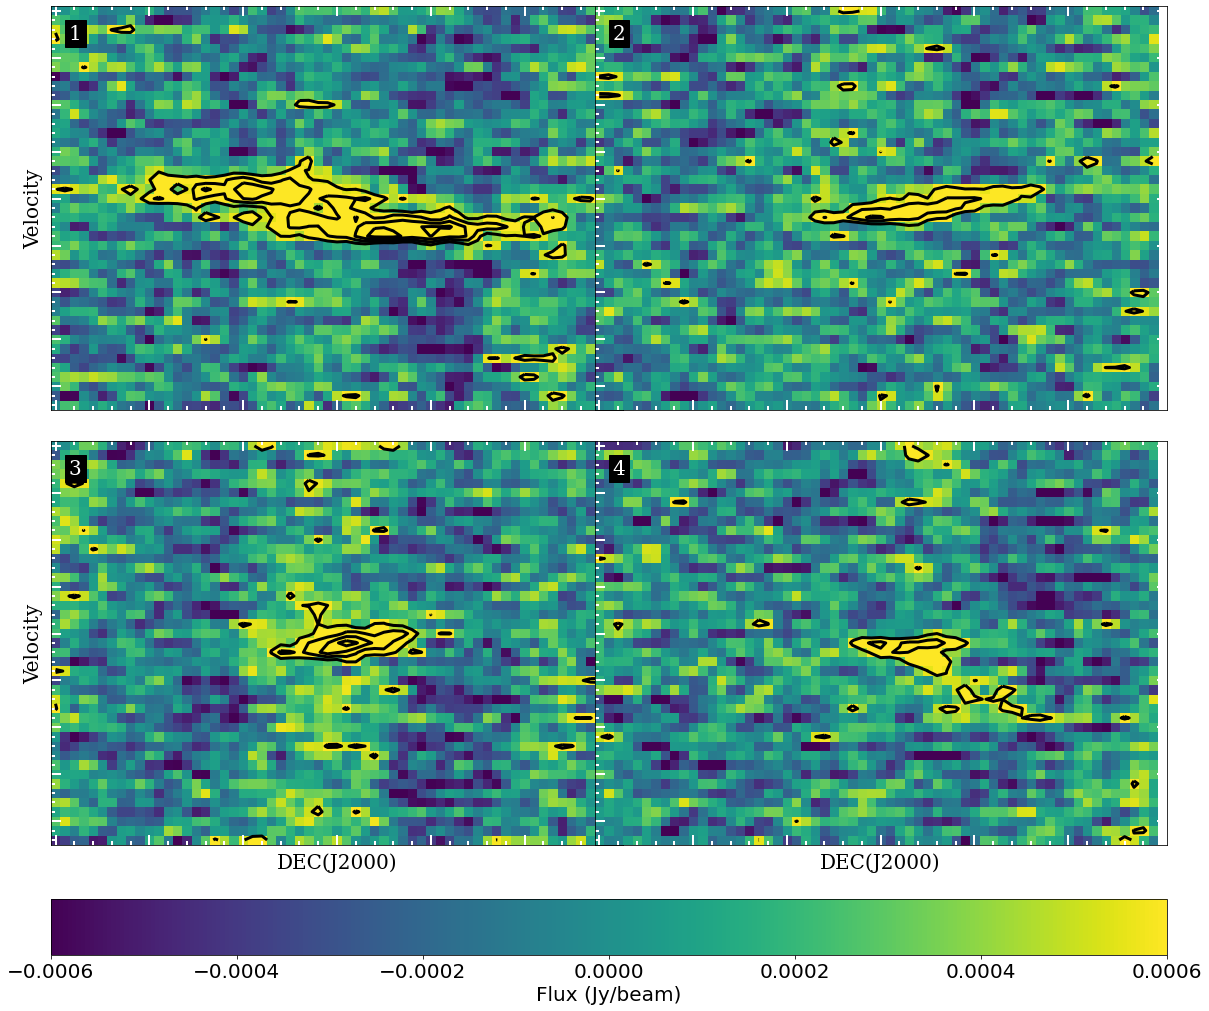

In [147]:
cube_det = [det1,det2,det3,det4]
field_det = ['1','2','3','4']
make_PV_diagram(cube_det,field_det,vmin=-6e-4,vmax=6e-4,ra_fixed=30,
            subplot_x=2,subplot_y=2,figsize=(20,20))